
**Name: Sparsh Saxena** <BR>
**Registration No.: 21BCE6015** <BR>
**Slot: L57+L58** <BR>
**Lab 2 Assignment Machine Learning** <BR>
**Submitted to: Ms. R.Jothi**  

**1st Question** <br>
Suppose you are asked to build a machine learning model for predicting the output of manufacturing machine based on its operational time.

In [91]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
import seaborn as sns

In [92]:
# dataset is imported and opened into a dataframe

data = pd.DataFrame(pd.read_csv("Machine.csv"))
data

,Operating_hours,Output
0,3,5
1,5,8
2,9,8
3,7,7
4,11,9
5,15,12
6,4,6
7,18,22


In [93]:
data.columns

Index(['Operating_hours', 'Output'], dtype='object')

Print all the predictor variables and dependent variables in the given
dataset (Machine.csv)

In [94]:
print("Predictor variables: ",*data.columns[:-1])
print("Dependent variables: ",data.columns[-1])

Predictor variables:  Operating_hours
Dependent variables:  Output


Understand the relationship between each predictor variable and the
dependent variable; draw the plot.

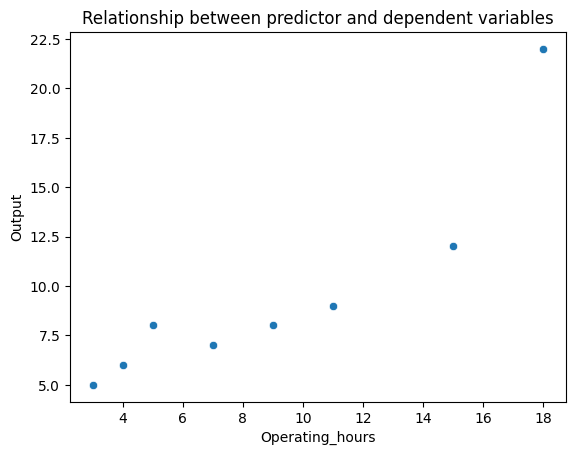

In [95]:
plt.title("Relationship between predictor and dependent variables")
sns.scatterplot(x='Operating_hours',y='Output',data=data)
plt.show()

Implement linear regression algorithm with gradient descent
optimization. Print the regression parameters after 2 epochs of training.
Predict the output of the manufacturing if the machine runs for 13 hours.
Also print the error of your regression model.

In [96]:
# Self-Implemented Linear Regression Algorithm using Gradient Descent

class GradientDescent:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        X = np.hstack((np.ones((n_samples, 1)), X))
        self.weights = np.zeros(n_features + 1)
        self.errors = []
        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights)
            errors = y - y_pred
            self.errors.append(np.mean(errors**2))
            gradient = -np.dot(X.T, errors) / n_samples
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        return np.dot(X, self.weights[1:])

In [97]:
# Here is Self Implemented Gradient Descent Algorithm applied for 2 epochs

model = GradientDescent(learning_rate=0.001,epochs=2)
X = data.drop('Output',axis=1)
y = data['Output']
model.fit(X,y)
print("For 2 epochs: ")
print("Trained weights(theta): ",*model.weights)
print("Predicted Output for 13 hours: ",model.predict([13]))
print("Error: ",model.errors[-1])


For 2 epochs: 
Trained weights(theta):  0.018256 0.20704228125000002
Predicted Output for 13 hours:  2.6915496562500003
Error:  95.55403648828126


Change the epochs and print the change in the model performance.

In [98]:
# Here is Self Implemented Gradient Descent Algorithm applied for 50 epochs

model = GradientDescent(learning_rate=0.001,epochs=50)
X = data.drop('Output',axis=1)
y = data['Output']
model.fit(X,y)
print("For 50 epochs: ")
print("Trained weights(theta): ",*model.weights)
print("Predicted Output for 13 hours: ",model.predict([13]))
print("Error: ",model.errors[-1])

For 50 epochs: 
Trained weights(theta):  0.10325265185895575 1.017343282065204
Predicted Output for 13 hours:  13.225462666847651
Error:  5.71296343769937


Use Sklearn model LinearRegression to solve the above problem and compare
results of your implementation with Sklearn model.

In [99]:
# Here is the sklearn.linear_model.LinearRegression for the same problem

from sklearn.linear_model import LinearRegression

X = np.array(data["Operating_hours"]).reshape(-1, 1)
Y = np.array(data["Output"]).reshape(-1, 1)

regr = LinearRegression()
regr.fit(X,Y)
print("Output value for 13 hours using Linear Regression Model: ",*regr.predict(np.array([[13]]))[0])

Output value for 13 hours using Linear Regression Model:  13.228960396039604


In [100]:
# Here is the sklearn.linear_model.SGDRegressor for the same problem for 2 and 50 epochs

model_2_epochs = SGDRegressor(learning_rate="constant", eta0=0.001, max_iter=2)
model_50_epochs = SGDRegressor(learning_rate="constant", eta0=0.001, max_iter=50)

headings = ["For 2 epochs: ","For 50 epochs: "]
i = 0

for model in [model_2_epochs, model_50_epochs]:
    print(headings[i])
    i+=1

    model.fit(X, y)

    # Print trained weights
    print("Trained weights(theta):", *model.coef_, *model.intercept_)

    # Predict for 13 hours
    new_data = [[13]]
    prediction = model.predict(new_data)
    print("Predicted output for 13 hours:", prediction[0])

    # Calculate error (assuming mean squared error)
    error = np.mean((y - model.predict(X))**2)
    print("Error:", error)

    print("\n")

For 2 epochs: 
Trained weights(theta): 0.8704096317271557 0.07454834284877927
Predicted output for 13 hours: 11.389873555301802
Error: 8.2077451309865


For 50 epochs: 
Trained weights(theta): 1.049722202286764 0.11637708479572689
Predicted output for 13 hours: 13.76276571452366
Error: 5.799147553486372




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


**2nd Question** <br>

Consider house price prediction problem based on Linear Regression. Use appropriate
Scikit/SKlearn Library function to apply linear regression on the given dataset


In [101]:
house_data = pd.DataFrame(pd.read_csv("housePrice_small.csv"))
house_data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
0,1,60,8450,7,5,2003,2003,150,856,1710,548,208500
1,2,20,9600,6,8,1976,1976,284,1262,1262,460,181500
2,3,60,11250,7,5,2001,2002,434,920,1786,608,223500
3,4,70,9550,7,5,1915,1970,540,756,1717,642,140000
4,5,60,14260,8,5,2000,2000,490,1145,2198,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,953,953,1647,460,175000
1456,1457,20,13175,6,6,1978,1988,589,1542,2073,500,210000
1457,1458,70,9042,7,9,1941,2006,877,1152,2340,252,266500
1458,1459,20,9717,5,6,1950,1996,0,1078,1078,240,142125


In [102]:
house_data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       'GarageArea', 'SalePrice'],
      dtype='object')

In [103]:
house_data.isnull().sum()

Id              0
MSSubClass      0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
BsmtUnfSF       0
TotalBsmtSF     0
GrLivArea       0
GarageArea      0
SalePrice       0
dtype: int64

In [104]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Print all the predictor variables and dependent variables in the given
dataset (housePrice_small.csv)

In [105]:
print("Predictor variables:", *list(house_data.columns)[1:-1])
print("Dependent variable:", house_data.columns[-1])

Predictor variables: MSSubClass LotArea OverallQual OverallCond YearBuilt YearRemodAdd BsmtUnfSF TotalBsmtSF GrLivArea GarageArea
Dependent variable: SalePrice


Understand the relationship between each predictor variable and the
dependent variable; Use heatmap to understand correlation between the
dependent and independent variables.

<Figure size 1500x1000 with 0 Axes>

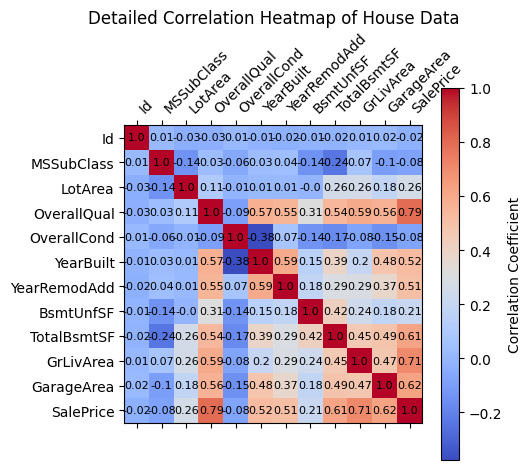

In [106]:
# Increase figure size and resolution
plt.figure(figsize=(15,10))

# Create heatmap with annotations and customization
plt.matshow(house_data.corr(), cmap="coolwarm")
for i in range(len(house_data.columns)):
    for j in range(len(house_data.columns)):
        corr = round(house_data.corr().iloc[i, j], 2)
        plt.text(j, i, corr, ha="center", va="center", fontsize=8)

plt.xticks(range(len(house_data.columns)), house_data.columns, rotation=45, ha="left")
plt.yticks(range(len(house_data.columns)), house_data.columns)
plt.colorbar(label="Correlation Coefficient")
plt.title("Detailed Correlation Heatmap of House Data")
plt.show()

In [107]:
#Dropping features with less correlation to the target variable to improve accuracy
dt = house_data.drop(["MSSubClass","Id","LotArea"],axis=1)
dt

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
0,7,5,2003,2003,150,856,1710,548,208500
1,6,8,1976,1976,284,1262,1262,460,181500
2,7,5,2001,2002,434,920,1786,608,223500
3,7,5,1915,1970,540,756,1717,642,140000
4,8,5,2000,2000,490,1145,2198,836,250000
...,...,...,...,...,...,...,...,...,...
1455,6,5,1999,2000,953,953,1647,460,175000
1456,6,6,1978,1988,589,1542,2073,500,210000
1457,7,9,1941,2006,877,1152,2340,252,266500
1458,5,6,1950,1996,0,1078,1078,240,142125


Keep 80% of samples for training and rest for testing

In [108]:
X2 = dt.drop("SalePrice", axis=1)  # Features
y2 = dt["SalePrice"]  # Target

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

Print the regression parameters after training.

In [109]:
model_2 = LinearRegression()
model_2.fit(X_train2, y_train2)

LinearRegression()

In [110]:
print("Regression coefficients:", *model_2.coef_)
print("Intercept:", model_2.intercept_)

Regression coefficients: 20174.44393738063 4219.107547380394 349.18271405899367 231.33646243121552 -17.821835160244973 31.4240997036718 49.72077518192873 43.704775123919944
Intercept: -1232982.0177335334


Show the accuracy on the test set.

In [111]:
predictions_2 = model_2.predict(X_test2)
mse_2 = mean_squared_error(y_test2, predictions_2)
r2_2 = r2_score(y_test2, predictions_2)
print("Mean squared error:", mse_2)
print("R-squared:", r2_2)

Mean squared error: 1477280660.1319542
R-squared: 0.8074031507619928


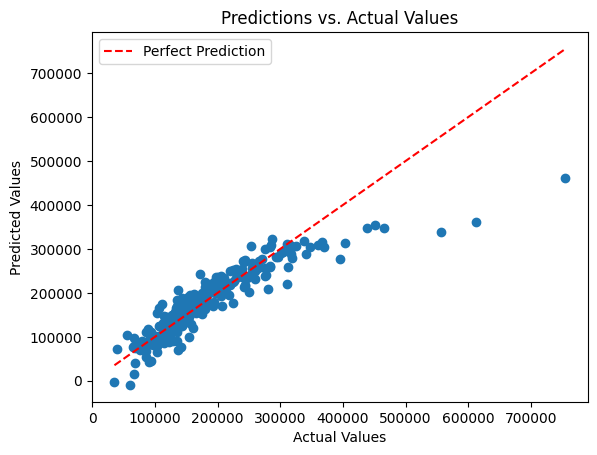

In [112]:
plt.scatter(y_test2,predictions_2)
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], linestyle='--', color='red',label='Perfect Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs. Actual Values")
plt.legend()
plt.show()

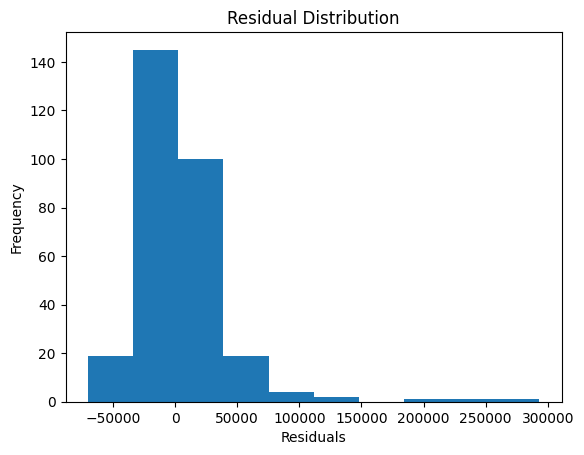

In [113]:
residuals = y_test2 - predictions_2
plt.hist(residuals)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

In [114]:
# Making a prediction for a sample test case
print("The prediction for the sample test case: ",model_2.predict(np.array([[7, 6, 1973, 1973, 343, 2223, 2223, 516]]))[0])

The prediction for the sample test case:  275741.9017022648


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
